SVM

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'xlabels'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


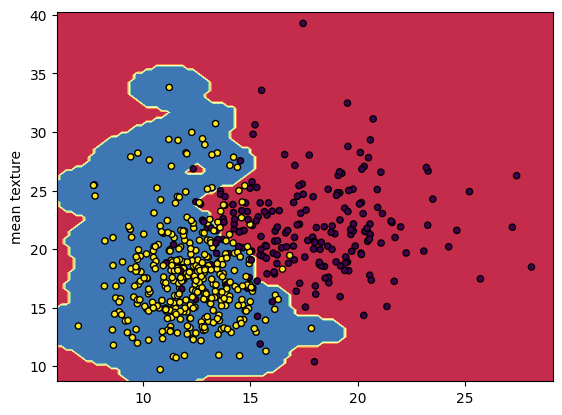

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

cancer=load_breast_cancer()
x=cancer.data[:,:2]
y=cancer.target

svm=SVC(kernel="rbf", gamma=0.8, C=1.0)
svm.fit(x,y)
DecisionBoundaryDisplay.from_estimator(
    svm, x, response_method="predict", cmap=plt.cm.Spectral, xlabels=cancer.feature_names[0], ylabel=cancer.feature_names[1]
)
plt.scatter(x[:,0], x[:,1], c=y, s=20, edgecolors="k")
plt.show()

DECISION TREE

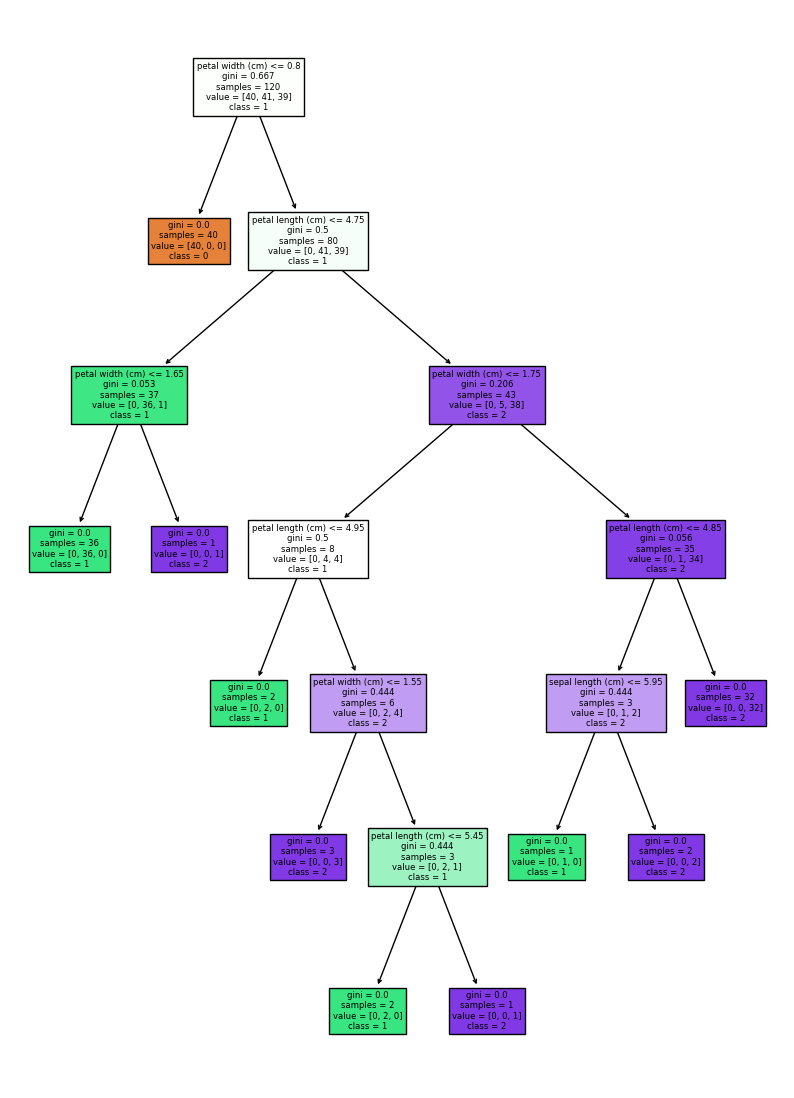

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

plt.figure(figsize=(10,14))
plot_tree(clf, filled = True, feature_names=iris.feature_names, class_names=[str(c) for c in clf.classes_])
plt.show()

print(accuracy)
print(matrix)
print(report)

LINEAR REGRESSION

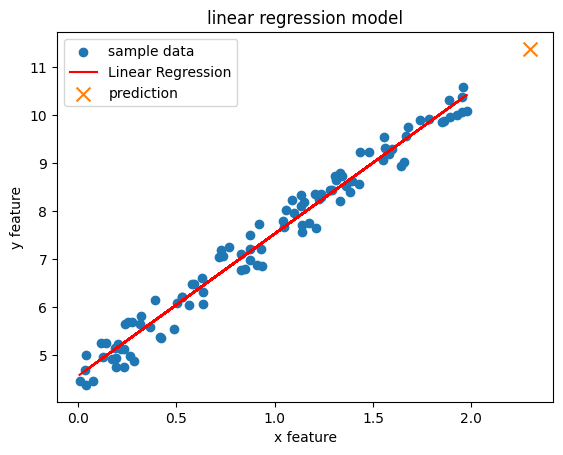

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

np.random.seed(0)
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)

model = LinearRegression()
model.fit(x,y)

x_new = np.array([[2.3]])
y_pred = model.predict(x_new)

plt.scatter(x,y,label="sample data")
plt.plot(x, model.predict(x), color="red", label="Linear Regression")
plt.scatter(x_new, y_pred, marker="x",s=100, label="prediction")
plt.legend()
plt.xlabel("x feature")
plt.ylabel("y feature")
plt.title("linear regression model")
plt.show()

KMEANS CLUSTERING

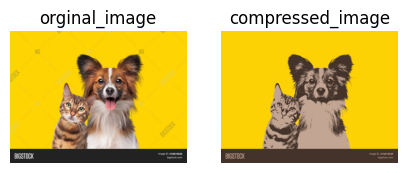

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np

original_image = Image.open("/content/sample_data/dog.jpg")
original_data = np.array(original_image)
original_pixels = original_data.reshape((-1,3))

kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(original_pixels)

compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
compressed_data = compressed_pixels.reshape(original_data.shape).astype(np.uint8)
compressed_image = Image.fromarray(compressed_data)

fig, axes = plt.subplots(1, 2, figsize=(5,5))
axes[0].imshow(original_image)
axes[0].set_title("orginal_image")
axes[0].axis("off")

axes[1].imshow(compressed_image)
axes[1].set_title("compressed_image")
axes[1].axis("off")

plt.show()

K NEAREST NEIGHBOUR

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=29)

knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred) * 100
confusion_matrix = confusion_matrix(y_test, y_pred)

print(accuracy)
print(confusion_matrix)

95.55555555555556
[[13  0  0]
 [ 0 14  1]
 [ 0  1 16]]


NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

93.33333333333333


BAYESIAN NETWORK

In [ ]:
!pip install pgmpy

+-------------+-------+
| Burglary(0) | 0.001 |
+-------------+-------+
| Burglary(1) | 0.999 |
+-------------+-------+
+---------------+-------+
| Earthquake(0) | 0.002 |
+---------------+-------+
| Earthquake(1) | 0.998 |
+---------------+-------+
+------------+---------------+---------------+---------------+---------------+
| Burglary   | Burglary(0)   | Burglary(0)   | Burglary(1)   | Burglary(1)   |
+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(0) | Earthquake(1) | Earthquake(0) | Earthquake(1) |
+------------+---------------+---------------+---------------+---------------+
| Alarm(0)   | 0.95          | 0.94          | 0.29          | 0.001         |
+------------+---------------+---------------+---------------+---------------+
| Alarm(1)   | 0.05          | 0.06          | 0.71          | 0.999         |
+------------+---------------+---------------+---------------+---------------+
+--------------+----------+----------+


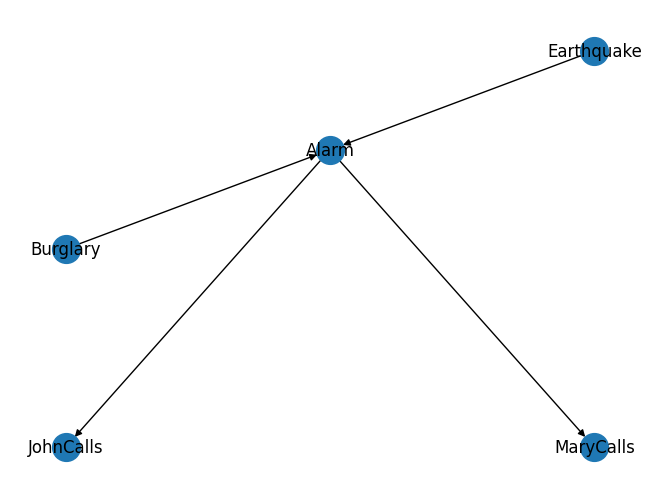

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

model = BayesianModel([('Burglary', 'Alarm'),
 ('Earthquake','Alarm'),
  ('Alarm','JohnCalls'),
   ('Alarm','MaryCalls')])
cpd_burglary = TabularCPD(variable = 'Burglary', variable_card=2, values=[[0.001],[0.999]])
cpd_earthquake = TabularCPD(variable = 'Earthquake', variable_card=2, values=[[0.002],[0.998]])
cpd_alarm = TabularCPD(variable = "Alarm", variable_card=2, values=[[0.95, 0.94, 0.29, 0.001],[0.05, 0.06, 0.71, 0.999]],
                       evidence = ["Burglary","Earthquake"], evidence_card=[2,2])
cpd_john = TabularCPD(variable = "JohnCalls", variable_card=2, values=[[0.90,0.05],[0.10,0.95]],
                      evidence = ['Alarm'], evidence_card=[2])
cpd_mary = TabularCPD(variable = "MaryCalls", variable_card=2, values=[[0.70,0.01],[0.30,0.99]],
                      evidence = ['Alarm'], evidence_card=[2])

model.add_cpds(cpd_burglary, cpd_earthquake, cpd_alarm, cpd_john, cpd_mary)
assert model.check_model(), "Model is not valid."
print(cpd_burglary)
print(cpd_earthquake)
print(cpd_alarm)
print(cpd_john)
print(cpd_mary)

pos ={'Burglary':(0,0),'Earthquake':(1,1),'Alarm':(0.5,0.5),'JohnCalls':(0,-1),'MaryCalls':(1,-1)}
nx.draw(model, pos, with_labels=True,node_size=400)

infer = VariableElimination(model)
posterior = infer.query(variables=['Burglary'], evidence={'JohnCalls':0,'MaryCalls':0})
print(posterior)

GBFS AND ASTAR

[1, 2, 3, 5, 6, 7]
[1, 2, 7, 6]


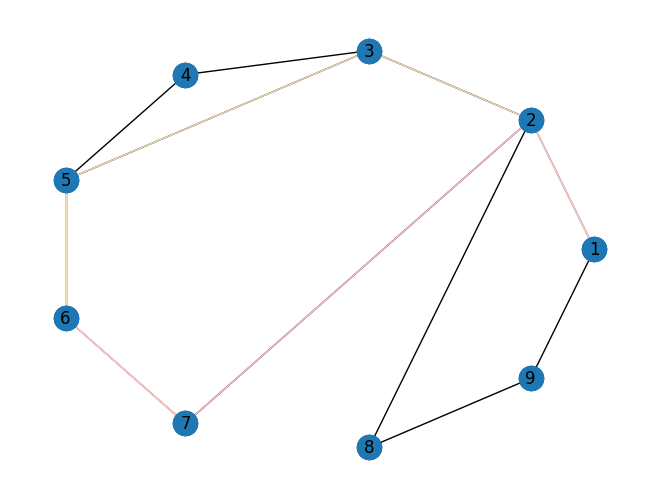

In [ ]:
import networkx as nx
import queue

g=nx.Graph()
g.add_nodes_from([1,2,3,4,5,6,7,8,9])
g.add_weighted_edges_from([(1,2,140),(1,9,75),(2,3,80),(2,7,99),(2,8,151),(8,9,71),
                           (3,4,146),(3,5,97),(4,5,138),(5,6,101),(6,7,211)])
pos=nx.circular_layout(g)
nx.draw(g, pos, with_labels=True)
heuristics={1:366, 2:253, 3:193, 4:160, 5:98, 6:0, 7:178, 8:380, 9:374}
#GBFS
def gbfs(source, heuristics, graph, goal):
  path=[]
  q=queue.PriorityQueue()
  q.put([heuristics,source])
  while(q.empty()==False):
    current=q.get()[1]
    path.append(current)
    q=queue.PriorityQueue()
    if(current==goal):
      break
    for i in graph.neighbors(current):
      if i not in path:
        q.put([heuristics[i],i])
  return path

#ASTAR
def astar(source, heuristics, graph, goal):
  path=[]
  distance=0
  q=queue.PriorityQueue()
  q.put((heuristics[source]+distance, [source,0]))
  while(q.empty()==False):
    current = q.get()[1]
    distance = current[1]
    q=queue.PriorityQueue()
    if(current==goal):
      break
    path.append(current[0])
    weight_edge_pairs = graph.edges(current[0], data=True)
    for j,i,weight in weight_edge_pairs:
      if i not in path:
        q.put((heuristics[i]+distance+weight['weight'],[i, distance]))
  return path

astar=astar(1, heuristics, g, 6)
print(astar)
astar_edge=[(astar[i],astar[i+1]) for i in range(0,len(astar)-1)]

gbfs = gbfs(1, heuristics, g, 6)
gbfs_edge = [(gbfs[i], gbfs[i+1]) for i in range(0, len(gbfs)-1)]

nx.draw(g, pos, edgelist=astar_edge, edge_color="wheat")
nx.draw(g, pos, edgelist=gbfs_edge, edge_color='pink')
print(gbfs)

TOWERS OF HANOI

In [ ]:
def toi(n, s, a, d):
  if(n==1):
    print(f"move disk {n} from {s} to {d}")
    return
  toi(n-1, s, d, a)
  print(f"move disk {n} from {s} to {d}")
  toi(n-1, a, s, d)
toi(3, 'A', 'B', 'C')

move disk 1 from A to C
move disk 2 from A to B
move disk 1 from C to B
move disk 3 from A to C
move disk 1 from B to A
move disk 2 from B to C
move disk 1 from A to C


In [ ]:
#towers of hanoi
def index(arr, n):
    i=len(arr)-1
    while(i>=0):
        if(arr[i]==n):
            return i
        i-=1
    return 0

def bottom(arr):
    i=len(arr)-1
    while(i>=0):
        if(arr[i]=="-"):
            return i
        i-=1
    return 0

def remove(n, src, aux, dest, s, d):
    if(s =='A'):
        src[index(src, n)] = "-"
    if(s == 'B'):
        aux[index(aux, n)] = "-"
    if(s == 'C'):
        dest[index(dest, n)] = "-"

    if(d=='A'):
        src[bottom(src)]= n
    if(d=='B'):
        aux[bottom(aux)]= n
    if(d=='C'):
        dest[bottom(dest)]= n

def display(n, src, aux, dest):
    print("A B C")
    for i in range(0,n):
        print(f"{src[i]} {aux[i]} {dest[i]}")
    print()

def move(n, disc, src, aux, dest, s, a, d):
    if(n==1):
        print(f"move disk {n} from {s} to {d}")

        remove(n, src, aux, dest, s, d)
        display(disc, src, aux, dest)
        return
    else:
        move(n-1,disc, src, aux, dest, s, d, a)
        print(f"move disk {n} from {s} to {d}")

        remove(n, src, aux, dest, s, d)
        display(disc, src, aux, dest)

        move(n-1,disc, src, aux, dest, a, s, d)

n=int(input("enter number of disk : "))
src=[]
aux=[]
dest=[]
for i in range(0,n):
    src.append(i+1)
    aux.append("-")
    dest.append("-")

display(n, src, aux, dest)
move(n, n, src, aux, dest, 'A', 'B', 'C')


enter number of disk : 3
A B C
1 - -
2 - -
3 - -

move disk 1 from A to C
A B C
- - -
2 - -
3 - 1

move disk 2 from A to B
A B C
- - -
- - -
3 2 1

move disk 1 from C to B
A B C
- - -
- 1 -
3 2 -

move disk 3 from A to C
A B C
- - -
- 1 -
- 2 3

move disk 1 from B to A
A B C
- - -
- - -
1 2 3

move disk 2 from B to C
A B C
- - -
- - 2
1 - 3

move disk 1 from A to C
A B C
- - 1
- - 2
- - 3



TIC TAC TOE

In [ ]:
#Tic-Tac-Toe using Mini-Max Algorithm
#Vineet Joshi
#GEU,Dehradun
"""-----------------------"""

#This function is used to draw the board's current state every time the user turn arrives.
def ConstBoard(board):
    print("Current State Of Board : \n\n");
    for i in range (0,9):
        if((i>0) and (i%3)==0):
            print("\n");
        if(board[i]==0):
            print("- ",end=" ");
        if (board[i]==1):
            print("O ",end=" ");
        if(board[i]==-1):
            print("X ",end=" ");
    print("\n\n");

#This function takes the user move as input and make the required changes on the board.
def User1Turn(board):
    pos=input("Enter X's position from [1...9]: ");
    pos=int(pos);
    if(board[pos-1]!=0):
        print("Wrong Move!!!");
        exit(0) ;
    board[pos-1]=-1;

def User2Turn(board):
    pos=input("Enter O's position from [1...9]: ");
    pos=int(pos);
    if(board[pos-1]!=0):
        print("Wrong Move!!!");
        exit(0);
    board[pos-1]=1;

#MinMax function.
def minimax(board,player):
    x=analyzeboard(board);
    if(x!=0):
        return (x*player);
    pos=-1;
    value=-2;
    for i in range(0,9):
        if(board[i]==0):
            board[i]=player;
            score=-minimax(board,(player*-1));
            if(score>value):
                value=score;
                pos=i;
            board[i]=0;

    if(pos==-1):
        return 0;
    return value;

#This function makes the computer's move using minmax algorithm.
def CompTurn(board):
    pos=-1;
    value=-2;
    for i in range(0,9):
        if(board[i]==0):
            board[i]=1;
            score=-minimax(board, -1);
            board[i]=0;
            if(score>value):
                value=score;
                pos=i;

    board[pos]=1;


#This function is used to analyze a game.
def analyzeboard(board):
    cb=[[0,1,2],[3,4,5],[6,7,8],[0,3,6],[1,4,7],[2,5,8],[0,4,8],[2,4,6]];

    for i in range(0,8):
        if(board[cb[i][0]] != 0 and
           board[cb[i][0]] == board[cb[i][1]] and
           board[cb[i][0]] == board[cb[i][2]]):
            return board[cb[i][2]];
    return 0;

#Main Function.
def main():
    choice=input("Enter 1 for single player, 2 for multiplayer: ");
    choice=int(choice);
    #The broad is considered in the form of a single dimentional array.
    #One player moves 1 and other move -1.
    board=[0,0,0,0,0,0,0,0,0];
    if(choice==1):
        print("Computer : O Vs. You : X");
        player= input("Enter to play 1(st) or 2(nd) :");
        player = int(player);
        for i in range (0,9):
            if(analyzeboard(board)!=0):
                break;
            if((i+player)%2==0):
                CompTurn(board);
            else:
                ConstBoard(board);
                User1Turn(board);
    else:
        for i in range (0,9):
            if(analyzeboard(board)!=0):
                break;
            if((i)%2==0):
                ConstBoard(board);
                User1Turn(board);
            else:
                ConstBoard(board);
                User2Turn(board);


    x=analyzeboard(board);
    if(x==0):
         ConstBoard(board);
         print("Draw!!!")
    if(x==-1):
         ConstBoard(board);
         print("X Wins!!! Y Loose !!!")
    if(x==1):
         ConstBoard(board);
         print("X Loose!!! O Wins !!!!")

#---------------#
main()
#---------------#



Enter 1 for single player, 2 for multiplayer: 1
Computer : O Vs. You : X
Enter to play 1(st) or 2(nd) :1
Current State Of Board : 


-  -  -  

-  -  -  

-  -  -  


Enter X's position from [1...9]: 2
Current State Of Board : 


O  X  -  

-  -  -  

-  -  -  


Enter X's position from [1...9]: 5
Current State Of Board : 


O  X  -  

-  X  -  

-  O  -  


Enter X's position from [1...9]: 3
Current State Of Board : 


O  X  X  

-  X  -  

O  O  -  


Enter X's position from [1...9]: 4
Current State Of Board : 


O  X  X  

X  X  -  

O  O  O  


X Loose!!! O Wins !!!!


In [ ]:
def print_board(board):
  for i in range(0,3):
    for j in range(0,3):
      print(board[i][j], end=" ")
    print()

def check_winner(board, current):
  for row in board:
    if all(cell == current for cell in row):
      return True

  for col in range(3):
    if all(board[row][col]==current for row in range(3)):
      return True
  if all(board[row][row]==current for row in range(3)):
    return True

  return False

def play():
  board = [['-','-','-'],['-','-','-'],['-','-','-']]
  flag = [[0,0,0],[0,0,0],[0,0,0]]
  players = ['X','0']
  turn = 0

  while True:
    print_board(board)
    current_player=players[turn%2]
    print(f"players{current_player} turn")

    try:
      row = int(input("enter row number [0,1,2] : "))
      col = int(input("enter column number [0,1,2] : "))
    except ValueError:
      print("invalid input")
      continue

    if(row<0 or row>2 or col<0 or col>2):
      print("invalid input")
      continue

    if(board[row][col]=='-'):
      board[row][col]=current_player
      if(check_winner(board, current_player)):
        print(f"{current_player} is winner")
        break
      elif( all(board[i][j]!="-" for i in range(3) for j in range(3))):
        print("match is draw")
    else:
      print("spot is alreary taken")
      continue
    turn+=1

play()


- - - 
- - - 
- - - 
playersX turn
enter row number [0,1,2] : 1
enter column number [0,1,2] : 2
- - - 
- - X 
- - - 
players0 turn
enter row number [0,1,2] : 0
enter column number [0,1,2] : 1
- 0 - 
- - X 
- - - 
playersX turn
enter row number [0,1,2] : 1
enter column number [0,1,2] : 1
- 0 - 
- X X 
- - - 
players0 turn
enter row number [0,1,2] : 0
enter column number [0,1,2] : 2
- 0 0 
- X X 
- - - 
playersX turn
enter row number [0,1,2] : 1
enter column number [0,1,2] : 0
X is winner
